In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load clustered review results
path_results = '/dtu/blackhole/1a/222266/clustered_reviews_umap15_final.csv'
df_results = pd.read_csv(path_results)
# Drop noise cluster (-1)
df_clean = df_results[df_results['cluster_dbscan'] != -1]
df_clean.head()

,row_id,rating,sentiment_score,cluster_kmeans,cluster_dbscan
2,B00085ZGFG,5.0,4.612285,5,78
4,B0007HVO0Q,1.0,2.503401,3,92
7,B000HJNEYS,1.0,1.954381,5,54
8,B0006AV3B4,5.0,4.839081,1,66
9,B000PHN85C,3.0,3.811538,5,79


In [3]:
# summarize sentiment scores into categories
# Create a new column with categorized sentiment scores
df_clean['sentiment_category'] = np.clip(df_clean['sentiment_score'].round().astype(int), 1, 5)
df_clean.head(n=100)





/tmp/ipykernel_236641/1760084320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sentiment_category'] = np.clip(df_clean['sentiment_score'].round().astype(int), 1, 5)


,row_id,rating,sentiment_score,cluster_kmeans,cluster_dbscan,sentiment_category
2,B00085ZGFG,5.0,4.612285,5,78,5
4,B0007HVO0Q,1.0,2.503401,3,92,3
7,B000HJNEYS,1.0,1.954381,5,54,2
8,B0006AV3B4,5.0,4.839081,1,66,5
9,B000PHN85C,3.0,3.811538,5,79,4
...,...,...,...,...,...,...
238,1887279806,3.0,3.019581,5,54,3
240,B0006AQJFO,4.0,3.710689,0,60,4
247,B0006E1JDC,5.0,2.991771,5,44,3
248,B000ETWJ74,5.0,4.907809,2,103,5


# Histogram


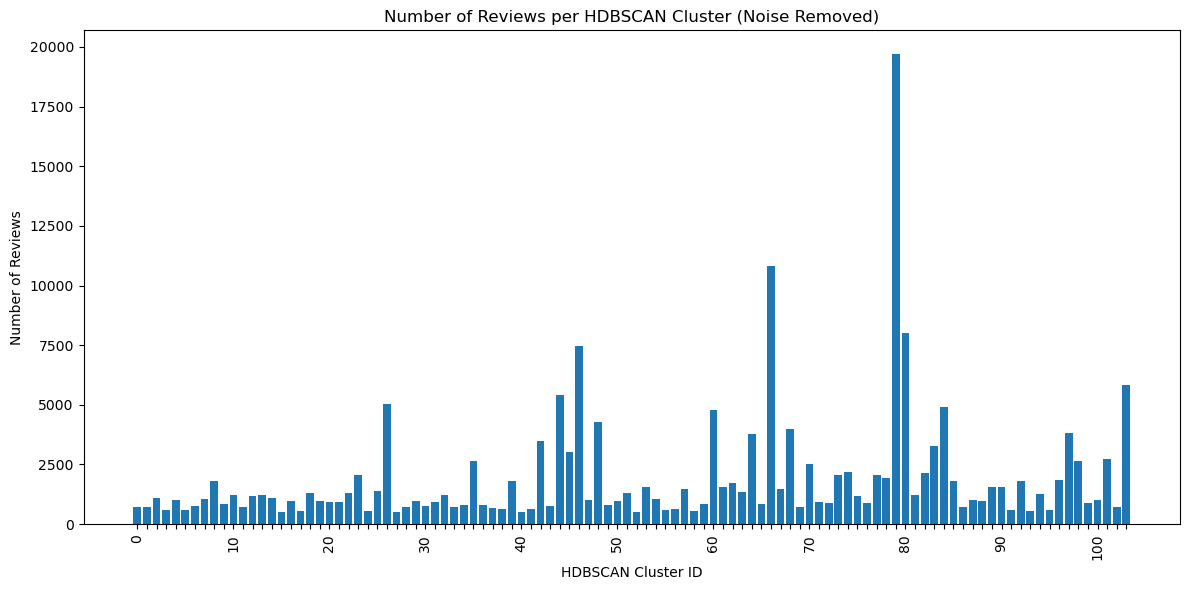

In [4]:
# Count reviews per cluster
cluster_counts = df_clean['cluster_dbscan'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('HDBSCAN Cluster ID')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per HDBSCAN Cluster (Noise Removed)')

# Show only every 10th cluster label
x_labels = [str(c) if i % 10 == 0 else '' for i, c in enumerate(cluster_counts.index)]
plt.xticks(cluster_counts.index, x_labels, rotation=90)

plt.tight_layout()
plt.show()

# Boxplots

/tmp/ipykernel_236641/1119879524.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=random_clusters)


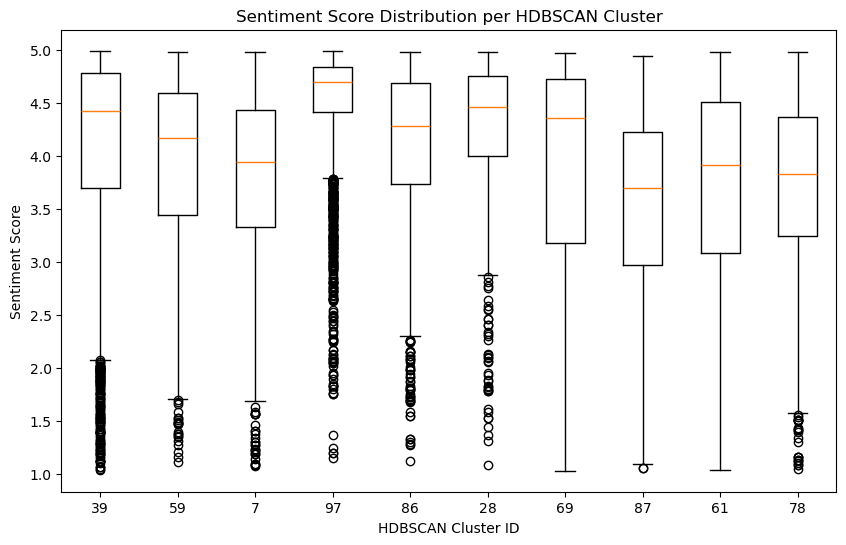

In [7]:

# Get unique cluster IDs
clusters = df_clean['cluster_dbscan'].unique()

# Randomly pick 10 clusters
# set seed for reproducibility
np.random.seed(42)  
random_clusters = np.random.choice(clusters, size=10, replace=False)

# Prepare data for boxplot
boxplot_data = [df_clean[df_clean['cluster_dbscan'] == c]['sentiment_score'] for c in random_clusters]

# Plot
plt.figure(figsize=(10,6))
plt.boxplot(boxplot_data, labels=random_clusters)
plt.xlabel('HDBSCAN Cluster ID')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Distribution per HDBSCAN Cluster')
plt.show()

# Histograms per rating

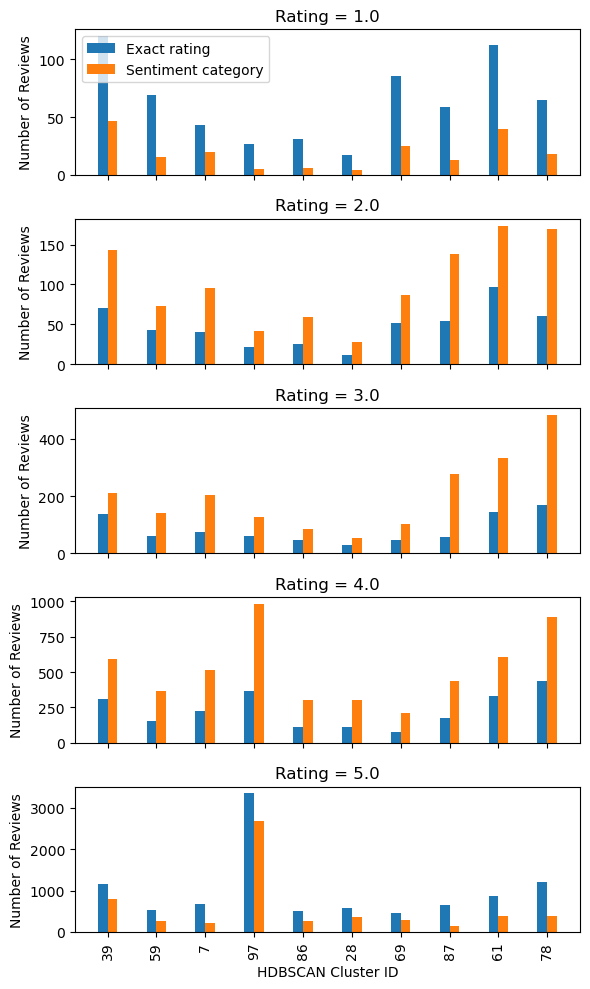

In [8]:

# Use the previously selected subset of clusters 
# Get unique ratings
ratings = sorted(df_clean['rating'].unique())
n_ratings = len(ratings)

fig, axes = plt.subplots(n_ratings, 1, figsize=(6, 2 * n_ratings), sharex=True)

for i, r in enumerate(ratings):
    ax = axes[i] if n_ratings > 1 else axes
    
    count_rating = []
    count_sentiment = []
    
    for cluster in random_clusters:
        cluster_data = df_clean[df_clean['cluster_dbscan'] == cluster]
        count_rating.append((cluster_data['rating'] == r).sum())
        count_sentiment.append((cluster_data['sentiment_category'] == r).sum())
    
    x = np.arange(len(random_clusters))
    width = 0.2
    
    ax.bar(x - width/2, count_rating, width, label='Exact rating')
    ax.bar(x + width/2, count_sentiment, width, label='Sentiment category')
    
    ax.set_ylabel('Number of Reviews')
    ax.set_title(f'Rating = {r}')
    if i == 0:
        ax.legend()

plt.xticks(np.arange(len(random_clusters)), random_clusters, rotation=90)
plt.xlabel('HDBSCAN Cluster ID')
plt.tight_layout()
plt.show()


